<a href="https://colab.research.google.com/github/NurikS/DengAI-FeverPrediction/blob/master/DengAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

os.mkdir("DengAI")
os.chdir("DengAI")

In [0]:
!wget https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv
!wget https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv
!wget https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_test.csv
!wget https://s3.amazonaws.com/drivendata/data/44/public/submission_format.csv

--2019-01-14 13:01:44--  https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.10.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.10.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287139 (280K) [text/csv]
Saving to: ‘dengue_features_train.csv’

dengue_features_tra 100%[===================>] 280.41K  --.-KB/s    in 0.1s    

2019-01-14 13:01:45 (2.32 MB/s) - ‘dengue_features_train.csv’ saved [287139/287139]

--2019-01-14 13:01:45--  https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.10.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.10.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19582 (19K) [text/csv]
Saving to: ‘dengue_labels_train.csv’

dengue_labels_train 100%[===================>]  19.12K  --.-KB/s    in 0.03s   

2019-01-14 13:01:46 (669 KB

In [0]:
#now when we have the data, let's create the environment for data analysis

import numpy as np                 #for linear algebra
import pandas as pd                #for reading and manipulating data
import matplotlib.pyplot as plt    #for data viz
import seaborn as sns              #for data viz
from scipy import stats
from scipy.stats import norm
%matplotlib inline
from sklearn.metrics import mean_absolute_error     
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [0]:
features = pd.read_csv("dengue_features_train.csv")
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [0]:
labels = pd.read_csv("dengue_labels_train.csv")
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [0]:
labels.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


Skewness: 5.273850
Kurtosis: 36.512530


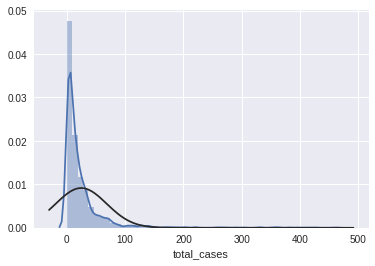

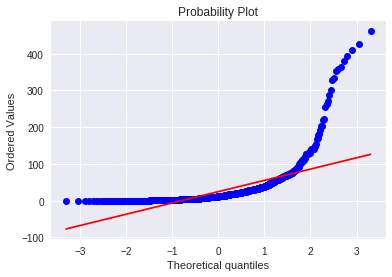

In [0]:
sns.distplot(labels["total_cases"], fit=norm)
fig = plt.figure()
res = stats.probplot(labels["total_cases"], plot=plt)
print("Skewness: %f" %labels['total_cases'].skew())
print("Kurtosis: %f" %labels['total_cases'].kurt())

In [0]:
data = pd.merge(features, labels, how='outer', on=labels.columns.tolist()[:-1])

In [0]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


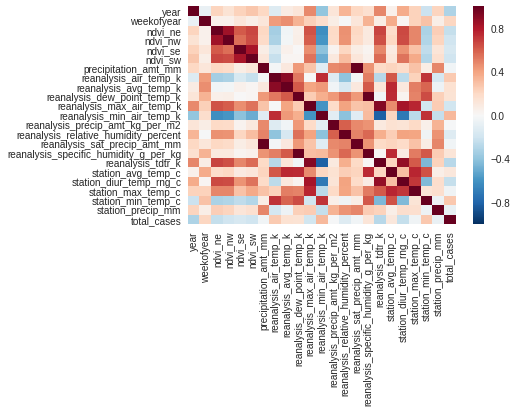

In [0]:
sns.heatmap(data.corr())

In [0]:
#the data is really skewed, let's fix it using log transform
#labels["total_cases"] = np.log1p(labels["total_cases"])

In [0]:
def extract_month(s):
    return int(s[5:7])

In [0]:
def preprocess(X, train = True):
  
    is_sj = X.city == 'sj'
    months = X.week_start_date.apply(extract_month)
    X.drop(["city", "year", "weekofyear", "week_start_date"], axis=1, inplace=True)
    
    if train:
      X.dropna(inplace=True)
    else:
      X.fillna(0, inplace=True)
    
    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X)
    
    X['is_sj'] = is_sj.loc[X.index]
    
    sliced_months = months.loc[X.index]
    
    months_features = pd.get_dummies(sliced_months)
    X = X.join(months_features)
    
    return X
   

In [0]:
X = preprocess(features)

In [0]:
y = labels.total_cases.loc[X.index]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [0]:
y_p = np.full(len(Y_test), np.mean(Y_train))
mean_absolute_error(Y_test, y_p)

17.47044664581161

In [0]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor(criterion='mae')
selector = RFE(rgr, 9, 2)
selector = selector.fit(X_train, Y_train)
X_train = X_train[X_train.columns[selector.get_support(indices=True)]]
X_test = X_test[X_test.columns[selector.get_support(indices=True)]]

In [0]:
X_train.describe()

,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm
count,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000
mean,-0.223719,-0.151282,-0.184789,0.133281,-0.114020,-0.101249,-0.262122,-0.252711,-0.107345
std,0.948540,0.931686,0.897013,1.006227,0.951035,1.006276,0.906527,0.889952,0.887419
min,-4.892291,-2.970694,-3.147682,-2.961288,-0.934349,-3.355359,-1.052204,-1.709955,-0.835426
25%,-0.820783,-0.774383,-0.815289,-0.621269,-0.665617,-0.884300,-0.803636,-0.836392,-0.663913
50%,-0.338566,-0.233499,-0.305976,0.119641,-0.383393,0.102806,-0.686313,-0.547393,-0.394394
75%,0.376786,0.381395,0.269882,0.953754,0.050962,0.725275,-0.362181,0.073296,0.143624
max,2.508341,3.356557,3.979663,2.583756,11.895046,1.732613,3.032253,3.472310,10.257753


In [0]:
X_test.describe()

,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.893945,0.604496,0.738385,-0.532569,0.455607,0.404576,1.047394,1.009791,0.428934
std,0.637950,1.038530,1.052125,0.776012,1.063337,0.867406,0.587690,0.749566,1.276365
min,-0.624831,-1.606479,-1.648478,-2.804205,-0.932100,-3.094703,-0.395986,-1.401252,-0.835426
25%,0.443825,-0.187624,-0.049038,-1.058746,-0.213834,-0.103743,0.601266,0.437828,-0.508735
50%,0.842862,0.628428,0.653621,-0.596659,0.251330,0.577068,0.976105,1.004878,0.012948
75%,1.296258,1.248313,1.394577,0.010730,0.693781,1.040510,1.557752,1.544150,0.925129
max,2.651918,4.470872,3.976294,1.460086,5.551186,2.405426,2.411830,3.058517,5.149133


###Linear model

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [0]:
Ridge = linear_model.Ridge(alpha = 140)
Ridge.fit(X_train, Y_train)
Y_pred = Ridge.predict(X_test)
mean_absolute_error(Y_test, Y_pred)

8.599145191222265

In [0]:
test_data = pd.read_csv("dengue_features_test.csv")
test_data = preprocess(test_data, train=False)
test_data = test_data[test_data.columns[selector.get_support(indices=True)]]

In [0]:
predsRidge = Ridge.predict(test_data)
predsRidge = predsRidge.astype(int)
submission = pd.read_csv("submission_format.csv")
submission["total_cases"] = predsRidge
submission.to_csv('ridgeoutput.csv')

###Neural Net

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

def model():
  
  model = Sequential()
  model.add(Dense(81, input_dim=9, kernel_initializer='normal', activation = 'relu'))
  model.add(Dense(162, kernel_initializer='normal', activation='relu'))
  model.add(Dense(40, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))

  optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='mae', optimizer=optimizer)
  
  return model

model()

In [0]:
model.fit(X_train, Y_train, batch_size=4, epochs=50, verbose=1)

Epoch 1/50
959/959 [==============================] - 1s 711us/step - loss: 17.6081
Epoch 2/50
959/959 [==============================] - 0s 295us/step - loss: 18.6083
Epoch 3/50
959/959 [==============================] - 0s 297us/step - loss: 16.8381
Epoch 4/50
959/959 [==============================] - 0s 295us/step - loss: 16.8165
Epoch 5/50
959/959 [==============================] - 0s 297us/step - loss: 16.7253
Epoch 6/50
959/959 [==============================] - 0s 299us/step - loss: 16.6359
Epoch 7/50
959/959 [==============================] - 0s 302us/step - loss: 16.4457
Epoch 8/50
959/959 [==============================] - 0s 303us/step - loss: 16.5090
Epoch 9/50
959/959 [==============================] - 0s 294us/step - loss: 16.4212
Epoch 10/50
959/959 [==============================] - 0s 302us/step - loss: 16.2015
Epoch 11/50
959/959 [==============================] - 0s 303us/step - loss: 16.1814
Epoch 12/50
959/959 [==============================] - 0s 303us/step - los

In [0]:
test_data = pd.read_csv("dengue_features_test.csv")
test_data = preprocess(test_data, train=False)
test_data = test_data[test_data.columns[selector.get_support(indices=True)]]

In [0]:
predsNN = model.predict(test_data)
predsNN = predsNN.astype(int)
submission = pd.read_csv("submission_format.csv")
submission["total_cases"] = predsNN
submission.to_csv('neuraloutput.csv')

###XGBoost

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import scipy.stats as st

one_to_left = st.beta(10,1)
from_zero_positive = st.expon(0,50)

params = {
    "n_estimators": st.randint(3, 60),
    "max_depth": st.randint(3, 60),
    "learning_rate":st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    "reg_alpha": from_zero_positive,
    "min_child_weight": from_zero_positive
}
#best params = {'colsample_bytree': 0.8320369789393744, 'gamma': 2.0974049871553833, 'learning_rate': 0.14541620039263492, 'max_depth': 57, 'min_child_weight': 85.37391881679474, 'n_estimators': 3, 'reg_alpha': 34.256651377835496, 'subsample': 0.9915172634648912}

xgbreg = XGBRegressor(n_threads=-1)


In [0]:
from sklearn.model_selection import RandomizedSearchCV

boostedmodel = RandomizedSearchCV(xgbreg, params, n_jobs=1, scoring='neg_mean_absolute_error')
boostedmodel.fit(X_train, Y_train)
print(boostedmodel.best_params_)
print(boostedmodel.best_score_)

{'colsample_bytree': 0.8320369789393744, 'gamma': 2.0974049871553833, 'learning_rate': 0.14541620039263492, 'max_depth': 57, 'min_child_weight': 85.37391881679474, 'n_estimators': 3, 'reg_alpha': 34.256651377835496, 'subsample': 0.9915172634648912}
-20.246198507493926


In [0]:
test_data = pd.read_csv("dengue_features_test.csv")
test_data = preprocess(test_data, train=False)
test_data = test_data[test_data.columns[selector.get_support(indices=True)]]

In [0]:
predsXGB = boostedmodel.predict(test_data)
predsXGB = predsXGB.astype(int)
submission = pd.read_csv("submission_format.csv")
submission["total_cases"] = predsXGB
submission.to_csv('xgboutput.csv')

###Stacked model

In [0]:
!git clone https://github.com/h2oai/pystacknet

Cloning into 'pystacknet'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), done.


In [0]:
cd pystacknet

/content/DengAI/pystacknet


In [0]:

!python setup.py install

running install
running bdist_egg
running egg_info
creating pystacknet.egg-info
writing pystacknet.egg-info/PKG-INFO
writing dependency_links to pystacknet.egg-info/dependency_links.txt
writing requirements to pystacknet.egg-info/requires.txt
writing top-level names to pystacknet.egg-info/top_level.txt
writing manifest file 'pystacknet.egg-info/SOURCES.txt'
reading manifest file 'pystacknet.egg-info/SOURCES.txt'
writing manifest file 'pystacknet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/pystacknet
copying pystacknet/pystacknet.py -> build/lib/pystacknet
copying pystacknet/__init__.py -> build/lib/pystacknet
copying pystacknet/metrics.py -> build/lib/pystacknet
creating build/lib/pystacknet/test
copying pystacknet/test/__init__.py -> build/lib/pystacknet/test
copying pystacknet/test/test_pystacknet.py -> build/lib/pystacknet/test
copying pystacknet/test/test_amaz

In [0]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from xgboost.sklearn import XGBRegressor
import scipy.stats as st

def keras_model():
  model = Sequential()
  
  model.add(Dense(81, input_dim=9, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.15))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='linear'))
  
  model.compile(loss='mean_absolute_error', optimizer='adam')
  
  return model

FOLDS = 5
METRIC = 'mae'
RESTACKING = False
RETRAIN = True
SEED = 42
VERBOSE = 0

models = [
    #LEVEL 1
    [
        Ridge(alpha=0.001, normalize=True, random_state=42),
        GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_features=8, min_samples_leaf=20, max_depth=6,
                                  random_state=42),
        KerasRegressor(build_fn=keras_model, epochs=10, batch_size=15, verbose=0),
        ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=42),
        XGBRegressor(n_threads=-1, colsample_bytree=0.8320369789393744, gamma=2.0974049871553833, learning_rate=0.14541620039263492, 
                     max_depth=57, min_child_weight=85.37391881679474, n_estimators=3, reg_alpha=34.256651377835496, 
                     subsample=0.9915172634648912)
    ],
    #LEVEL 2
    [
        MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,batch_size=30, 
                     learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,max_iter=20, shuffle=True, 
                     random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,beta_1=0.1, beta_2=0.1, epsilon=0.1)
    ]
]

model = StackNetRegressor(models, metric=METRIC, folds=FOLDS,
                         restacking=RESTACKING, use_retraining=RETRAIN,
                         random_state=SEED, verbose=VERBOSE)

model.fit(X_train,Y_train)



In [0]:
X_test = X_test.values

preds=model.predict(X_test)

mean_absolute_error(Y_test, preds)


6.042730236274723

In [0]:
cd ..

/content/DengAI


In [0]:
test_data = pd.read_csv("dengue_features_test.csv")
test_data = preprocess(test_data, train=False)
test_data = test_data[test_data.columns[selector.get_support(indices=True)]]
test_data = test_data.values

In [0]:
predsStacked = model.predict(test_data)
predsStacked = predsStacked.astype(int)
submission = pd.read_csv("submission_format.csv")
submission["total_cases"] = predsStacked
submission.to_csv('stackedoutput.csv')